
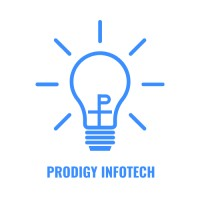
## Prodigy Infotech

### Author : Ahmed Sheta


### Data Science
### Task-04



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">twitter-classification-using-logistic-regrition </p>

**introduction :
 Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Importing libraries</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted

from wordcloud import WordCloud #Word visualization
from nltk import word_tokenize
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bios\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Data Gatehering</p>

In [2]:
data=pd.read_csv('twitter_training.csv',sep = ',', names=['id','country','Label','Text'])
validation=pd.read_csv('twitter_validation.csv',sep = ',', names=['id','Company','Label','Text'])

In [3]:
#show data:
data.head()

,id,country,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
# show validation:
validation.head()

,id,Company,Label,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
# drop ID column from data , validaion :

data=data.drop("id", axis='columns')

validation=validation.drop("id", axis='columns')

In [6]:
data.info()
print('\n','*'*60,'\n')
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  74682 non-null  object
 1   Label    74682 non-null  object
 2   Text     73996 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB

 ************************************************************ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  1000 non-null   object
 1   Label    1000 non-null   object
 2   Text     1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [7]:
#show null values in data , validation datasets :
print(data.isnull().sum())
print('\n','*'*60,'\n')
print(validation.isnull().sum())

country      0
Label        0
Text       686
dtype: int64

 ************************************************************ 

Company    0
Label      0
Text       0
dtype: int64


In [8]:
#show unique values:
print(data['country'].unique())
print('\n','*'*60,'\n')      
validation['Company'].unique()

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']

 ************************************************************ 



array(['Facebook', 'Amazon', 'Microsoft', 'CS-GO', 'Google', 'FIFA',
       'MaddenNFL', 'TomClancysRainbowSix', 'AssassinsCreed',
       'CallOfDuty', 'Dota2', 'Verizon', 'NBA2K', 'Nvidia',
       'GrandTheftAuto(GTA)', 'RedDeadRedemption(RDR)', 'Hearthstone',
       'ApexLegends', 'Overwatch', 'PlayerUnknownsBattlegrounds(PUBG)',
       'Borderlands', 'PlayStation5(PS5)', 'johnson&johnson', 'Fortnite',
       'Xbox(Xseries)', 'CallOfDutyBlackopsColdWar', 'HomeDepot',
       'Cyberpunk2077', 'TomClancysGhostRecon', 'WorldOfCraft',
       'LeagueOfLegends', 'Battlefield'], dtype=object)

In [9]:
# Check for null values in the 'text' column
null_values = data['Text'].isnull()

# Display the rows with null values in the 'text' column
rows_with_null = data[null_values]
print(rows_with_null)

           country     Label Text
61     Borderlands   Neutral  NaN
553    Borderlands   Neutral  NaN
589    Borderlands   Neutral  NaN
745    Borderlands  Positive  NaN
1105   Borderlands  Positive  NaN
...            ...       ...  ...
73972       Nvidia  Positive  NaN
73973       Nvidia  Positive  NaN
74421       Nvidia  Positive  NaN
74422       Nvidia  Positive  NaN
74423       Nvidia  Positive  NaN

[686 rows x 3 columns]


In [10]:
# Replace missing values in Text column with mode
data['Text'].fillna(data['Text'].mode()[0], inplace=True)
data.isnull().sum()

country    0
Label      0
Text       0
dtype: int64

In [11]:
unique_label=data['Label'].unique().tolist()
unique_label

['Positive', 'Neutral', 'Negative', 'Irrelevant']

In [12]:
data_label_count = data.Label.value_counts()
print('(data) : ','\n',data_label_count)
print('\n','*'*60,'\n')
validation_label_count=validation.Label.value_counts()
print('(validation) : ','\n',validation_label_count)

(data) :  
 Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Label, dtype: int64

 ************************************************************ 

(validation) :  
 Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Label, dtype: int64


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Data Preprocessing</p>

In [13]:
## Text transformation
data["lower"]=data.Text.str.lower() #lowercase
data["lower"]=[str(data) for data in data.lower] #converting all to string
data["lower"]=data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
validation["lower"]=validation.Text.str.lower() #lowercase
validation["lower"]=[str(data) for data in validation.lower] #converting all to stringv
validation["lower"]=validation.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [14]:
data

,country,Label,Text,lower
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...


In [15]:
validation

,Company,Label,Text,lower
0,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
2,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
...,...,...,...,...
995,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto is the arts and culture capital of c...
996,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,this is actually a good move tot bring more vi...
997,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked so it s time to drink wine n play...
998,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought a fraction of microsoft today small wins


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Positive Wordcloud on Label</p>

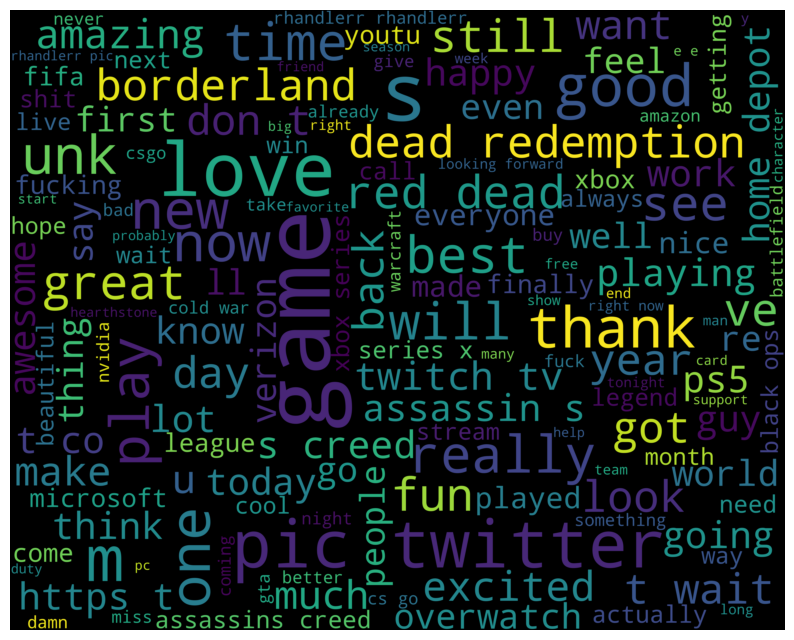

In [16]:
word_cloud_text = ''.join(data[data["Label"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=120,
    max_words=150,
    background_color="black",
    scale=10,
    width=1000,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;"> Negative Wordcloud on Label</p>

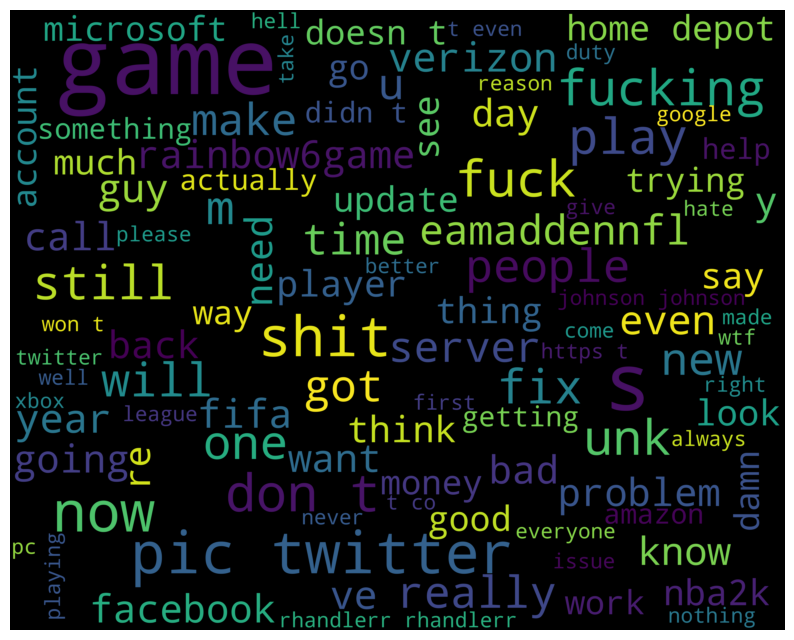

In [17]:
word_cloud_text = ''.join(data[data["Label"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=120,
    max_words=100,
    background_color="black",
    scale=10,
    width=1000,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Irrelevant  Wordcloud on Label</p>

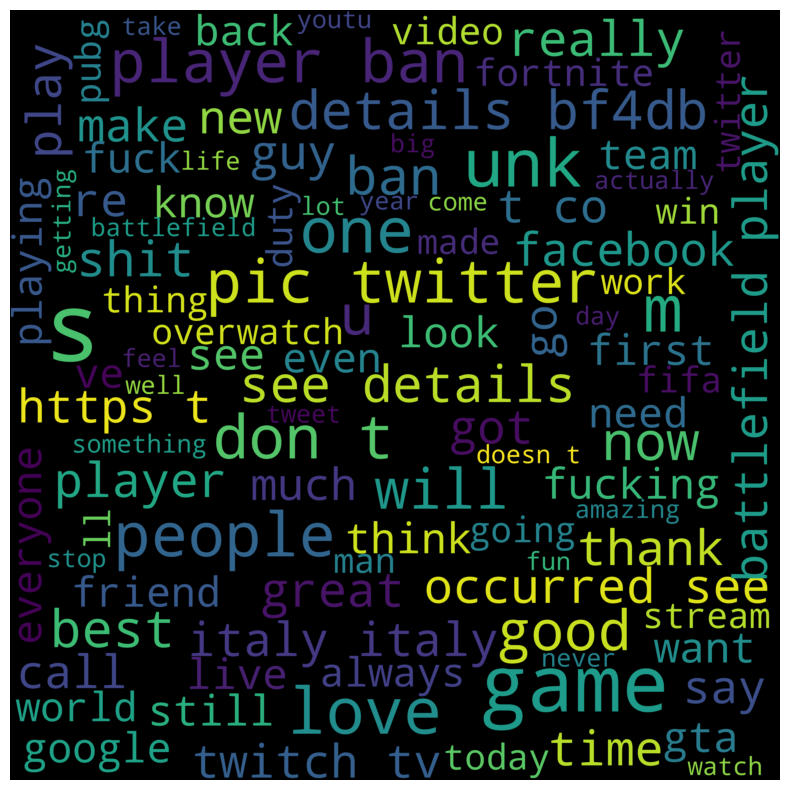

In [18]:
word_cloud_text = ''.join(data[data["Label"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
#Count information per category
plot1=data.groupby(by=["country","Label"]).count().reset_index()
plot1.head(12)

,country,Label,Text,lower
0,Amazon,Irrelevant,192,192
1,Amazon,Negative,576,576
2,Amazon,Neutral,1236,1236
3,Amazon,Positive,312,312
4,ApexLegends,Irrelevant,192,192
5,ApexLegends,Negative,600,600
6,ApexLegends,Neutral,942,942
7,ApexLegends,Positive,642,642
8,AssassinsCreed,Irrelevant,264,264
9,AssassinsCreed,Negative,378,378


# Count number on positive or negative or neutral or irrevelent

<Axes: xlabel='Label', ylabel='count'>

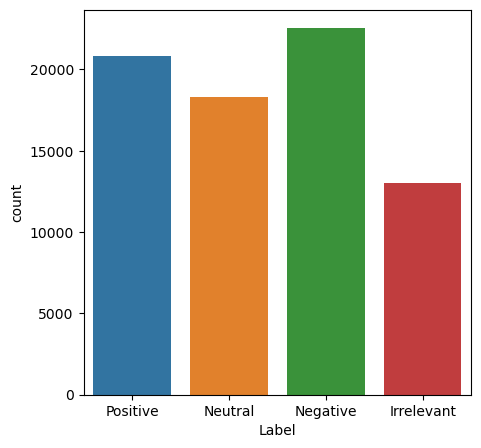

In [20]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Label', data = data)

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Label on Data</p>

Text(0.5, 1.0, 'Distribution of sentiments')

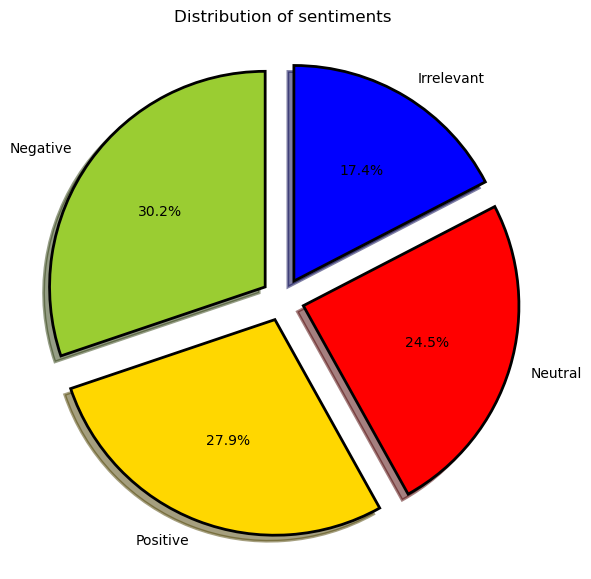

In [21]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red","blue")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = data['Label'].value_counts()
explode = (0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Label on Validation </p>

Text(0.5, 1.0, 'Distribution of sentiments')

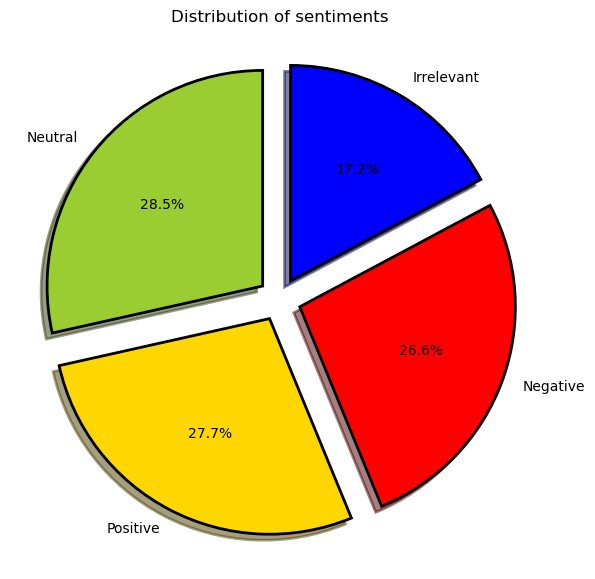

In [22]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red","blue")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = validation['Label'].value_counts()
explode = (0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [23]:
validation

,Company,Label,Text,lower
0,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
2,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
...,...,...,...,...
995,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto is the arts and culture capital of c...
996,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,this is actually a good move tot bring more vi...
997,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked so it s time to drink wine n play...
998,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought a fraction of microsoft today small wins


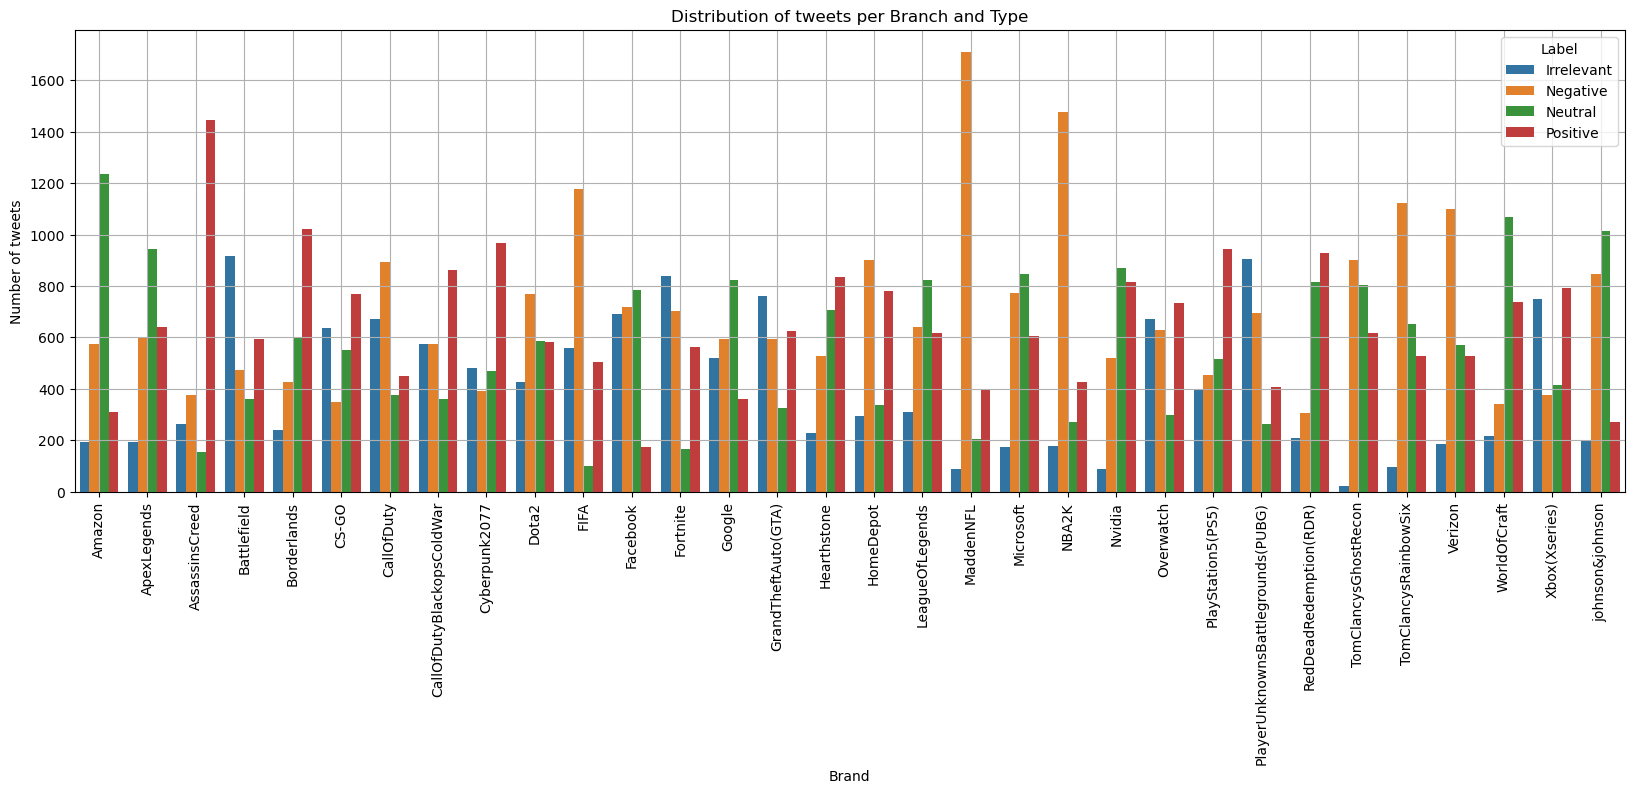

In [24]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="country",y="Text",hue="Label")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [25]:
texts = data['Text']

In [26]:
text_lens = [len(t.split()) for t in texts.values]
len_mean = np.mean(text_lens)
len_mean

19.05001205109665

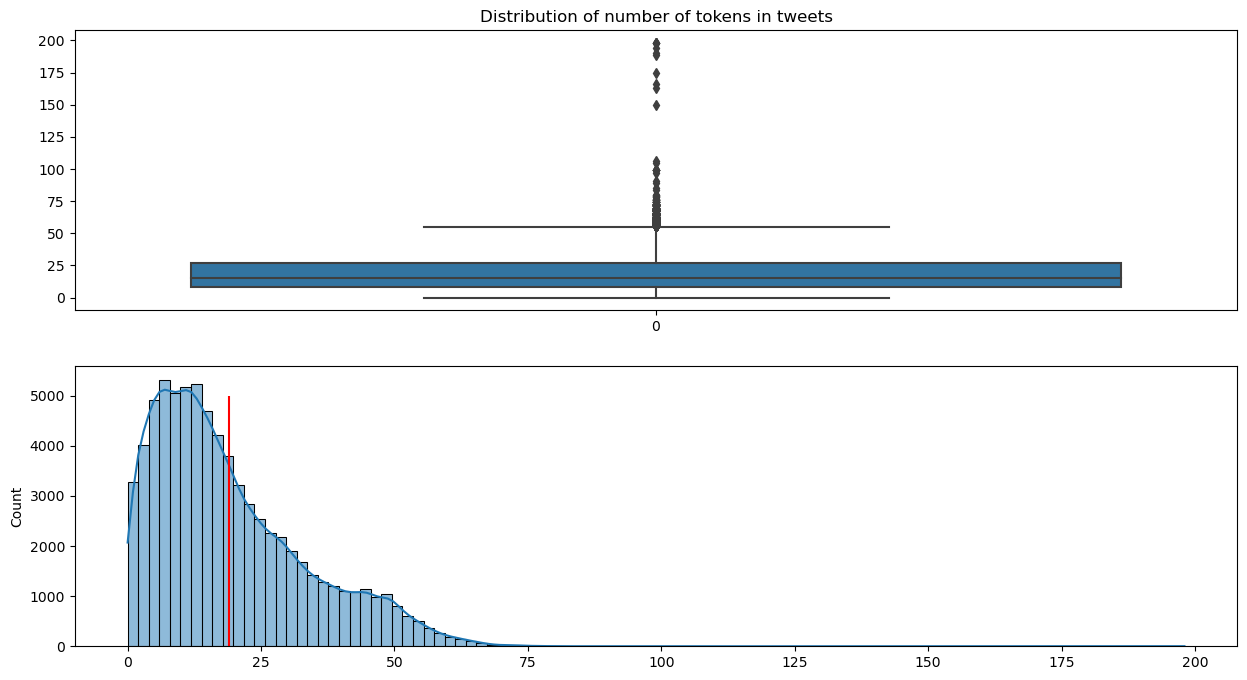

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].set_title('Distribution of number of tokens in tweets')
sns.boxplot(text_lens, ax=axes[0])
sns.histplot(text_lens, bins=100, kde=True, ax=axes[1])
axes[1].vlines(len_mean, 0, 5000, color = 'r')
plt.show()

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;"> fIND Unique Words </p>

In [28]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)
bow_counts

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x000001D9FD70DC60>)

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Train - Test splitting </p>

In [90]:
reviews_train, reviews_test = train_test_split(data, test_size=0.2, random_state=0)

In [91]:
#Labels for train and test encoding
y_train_bow = reviews_train['Label']
y_test_bow = reviews_test['Label']

In [92]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bios\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Logistic Regression Model</p>

In [94]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  81.40858271406574


In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test_bow, test_pred))
print("\n")
print(classification_report(y_test_bow, test_pred))

[[1641  312  180  450]
 [  62 3872  135  400]
 [  86  250 2904  429]
 [  85  252  136 3743]]


              precision    recall  f1-score   support

  Irrelevant       0.88      0.64      0.74      2583
    Negative       0.83      0.87      0.85      4469
     Neutral       0.87      0.79      0.83      3669
    Positive       0.75      0.89      0.81      4216

    accuracy                           0.81     14937
   macro avg       0.83      0.80      0.80     14937
weighted avg       0.82      0.81      0.81     14937



In [47]:
#train test split
X_train=data.drop(['Label'] , axis=1)
X_test=validation.drop(['Label'] , axis=1)
y_train=data['Label']
y_test=validation['Label']

In [110]:
X_train.head(5)

,country,Text,lower
0,Borderlands,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Borderlands,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,Borderlands,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,Borderlands,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Borderlands,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [49]:
y_train

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
74677    Positive
74678    Positive
74679    Positive
74680    Positive
74681    Positive
Name: Label, Length: 74682, dtype: object

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">count the no of words by CountVectorizer
</p>

In [52]:
#count the no of words in a sentence
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.Text)
X_train_count[0]

<1x31062 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [59]:
data.Label.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;"> label Encoding </p>

In [73]:
#label Encoding 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [74]:
y_train

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;"> MultinomialNB Model </p>

In [81]:
#model
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
y_pred=model.fit(X_train_count,y_train)


In [83]:
X_test_count=v.transform(X_test.Text)
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
X_test_count.shape

(1000, 31062)

In [89]:
model.score(X_test_count,y_test)

0.825

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;"> Test MultinomialNB Model </p>

In [103]:
comment=[
    'I am coming to the borders and I will kill you.'
]
comment_count=v.transform(comment)
model.predict(comment_count)
     

array([3], dtype=int64)

In [105]:
comment=['i hard like me rare london de handsome.']
comment_count=v.transform(comment)
model.predict(comment_count)
     

array([2], dtype=int64)

In [112]:
comment=['love']
comment_count=v.transform(comment)
model.predict(comment_count)

array([3], dtype=int64)